In [1]:
pip install numpy matplotlib scipy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [3]:
import librosa

**A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.**

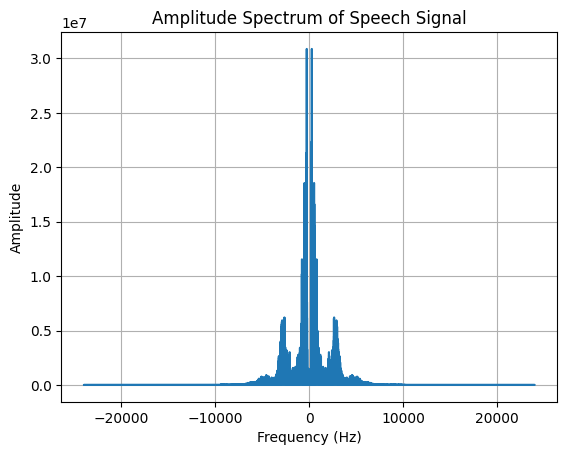

In [4]:
sampling_rate, speech_signal = wavfile.read('cherry.wav')

# Perform FFT
fft_result = np.fft.fft(speech_signal)

# Calculate the amplitudes of the spectral components
amplitudes = np.abs(fft_result)

# Create the frequency axis
freq_axis = np.fft.fftfreq(len(amplitudes), 1/sampling_rate)

# Plot the amplitude part of the spectral components
plt.plot(freq_axis, amplitudes)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


**A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.**

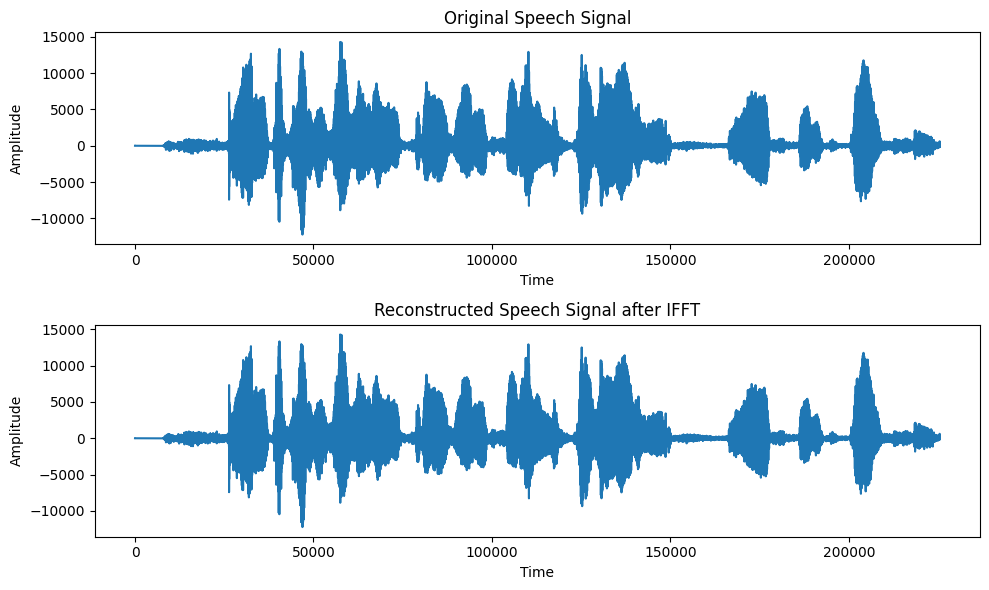

In [5]:
original_sampling_rate, original_speech_signal = wavfile.read('cherry.wav')

# Perform FFT
fft_result = np.fft.fft(original_speech_signal)

# Perform IFFT to inverse transform back to time domain
ifft_result = np.fft.ifft(fft_result)

# Convert to real values (remove any imaginary parts that might result from numerical errors)
ifft_result = np.real(ifft_result)

# Plot the original and reconstructed signals
plt.figure(figsize=(10, 6))

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(original_speech_signal)
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the reconstructed signal after IFFT
plt.subplot(2, 1, 2)
plt.plot(ifft_result)
plt.title('Reconstructed Speech Signal after IFFT')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


**A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.**

In [6]:
full_sampling_rate, full_speech_signal = wavfile.read('cherry.wav')

In [7]:
total_samples = len(full_speech_signal)
print(total_samples)

225496


In [8]:
start_sample =int(1.5*full_sampling_rate)
end_sample = int(2*full_sampling_rate)


In [9]:
# Extract the word segment based on the determined start and end samples
word_segment = full_speech_signal[start_sample:end_sample]

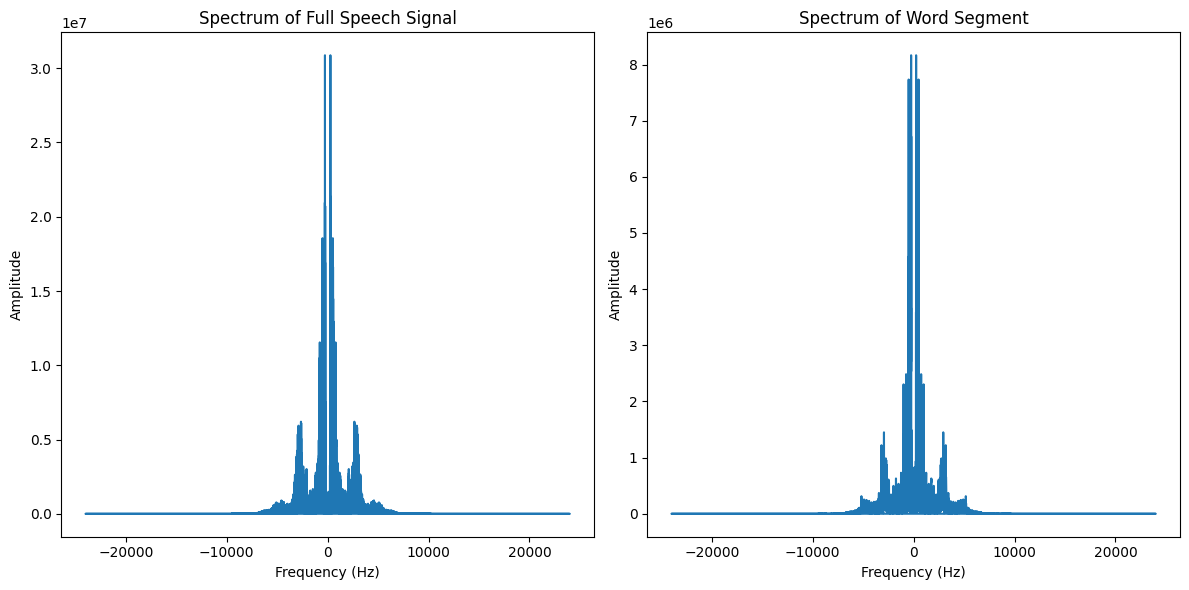

In [10]:
# Perform FFT on the full signal
fft_full_signal = np.fft.fft(full_speech_signal)
# Create the frequency axis for the full signal
freq_axis_full_signal = np.fft.fftfreq(total_samples, 1 / full_sampling_rate)

# Perform FFT on the word segment
fft_word_segment = np.fft.fft(word_segment)
# Create the frequency axis for the word segment
freq_axis_word_segment = np.fft.fftfreq(end_sample - start_sample, 1 / full_sampling_rate)


# Calculate the amplitudes of the spectral components
amplitudes_full_signal = np.abs(fft_full_signal)
amplitudes_word_segment = np.abs(fft_word_segment)

# Plot the spectrum of the full signal
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(freq_axis_full_signal, amplitudes_full_signal)
plt.title('Spectrum of Full Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

# Plot the spectrum of the word segment
plt.subplot(1, 2, 2)
plt.plot(freq_axis_word_segment, amplitudes_word_segment)
plt.title('Spectrum of Word Segment')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

**A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.**

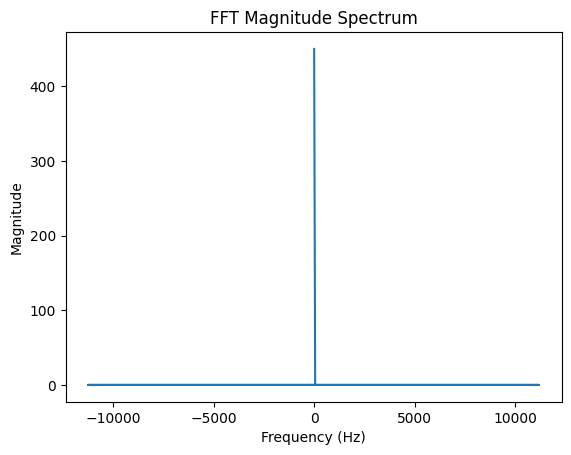

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 22500  # in Hz
duration = 0.02  # in seconds
num_samples = int(sampling_rate * duration)

# Generate rectangular window
rectangular_window = np.ones(num_samples)

# Apply FFT
fft_result = np.fft.fft(rectangular_window)
fft_magnitude = np.abs(fft_result)
fft_frequency = np.fft.fftfreq(num_samples, d=1/sampling_rate)

# Plot the magnitude spectrum
plt.plot(fft_frequency, fft_magnitude)
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


**A5. Break your speech signal into window lengths of 20 mSec intervals.
Evaluate the frequency components using numpy.fft.rfft().
Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix.
You may use librosa.stft() or scipy.signal.stft() as well to achieve this.**

In [12]:
import scipy.io.wavfile as wav

In [13]:
sampling_rate = 22500  # in Hz
duration = 5
window_size = int(sampling_rate * 0.02)  # 20 ms

In [14]:
sampling_rate, signal = wav.read('cherry.wav')

In [15]:
# Create an array to store frequency components
frequency_components = []
for i in range(0, len(signal) - window_size, window_size // 2):
    window = signal[i:i + window_size]
    # Apply a window function (e.g., Hamming window) to reduce spectral leakage
    window = window * np.hamming(window_size)
    # Compute the FFT
    spectrum = np.fft.rfft(window)

    # Append the magnitude spectrum to the array
    frequency_components.append(np.abs(spectrum))

# Convert the list of arrays into a 2D NumPy array
frequency_components = np.vstack(frequency_components)

In [16]:
# 'frequency_components' now contains the frequency components for each window
# Each row corresponds to a window, and columns correspond to frequency bins


In [17]:
# Plot a heatmap directly

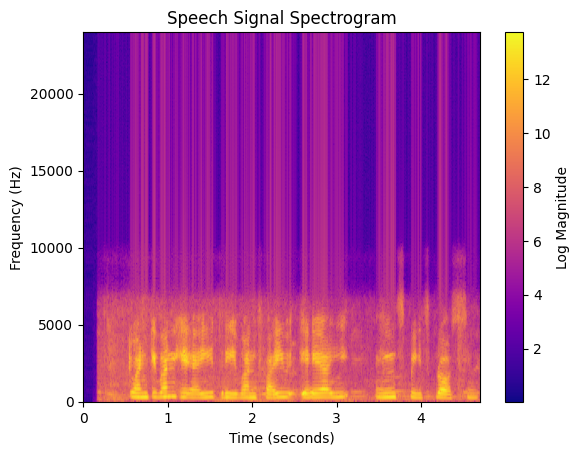

In [18]:
plt.imshow(np.log1p(frequency_components.T), aspect='auto', cmap='plasma', origin='lower', extent=[0, len(signal)/sampling_rate, 0, sampling_rate/2])
plt.colorbar(label='Log Magnitude')
plt.title('Speech Signal Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()

**A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the same duration. Compare the plots.**

In [19]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import librosa
import librosa.display

In [20]:
sampling_rate, signal = wav.read('cherry.wav')

In [21]:
window_length = 0.02 # in sec
window_size = int(window_length * sampling_rate)

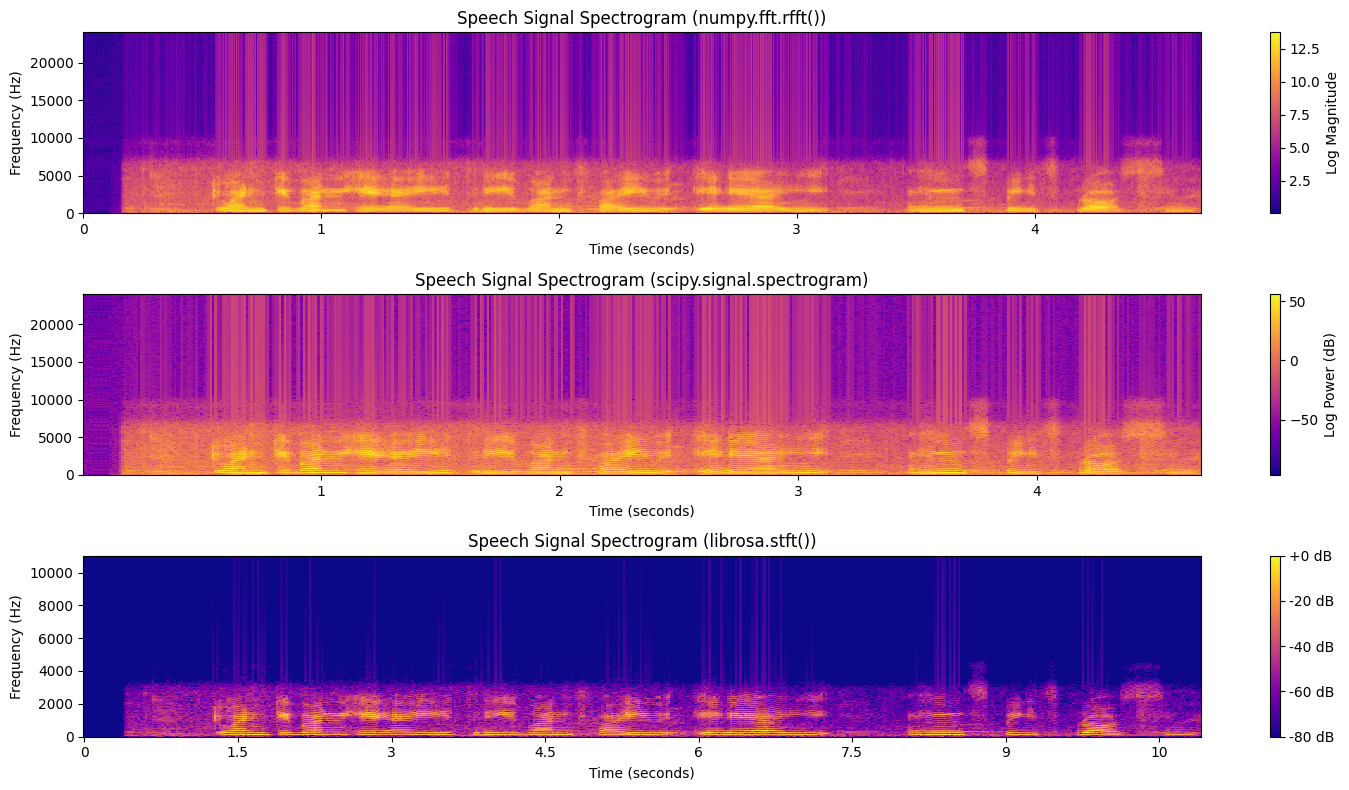

In [22]:
signal_float = signal.astype(np.float32) / np.iinfo(np.int16).max
# Compute the spectrogram using scipy.signal.spectrogram
frequencies, times, Sxx = spectrogram(signal, fs=sampling_rate, window='hamming', nperseg=window_size, noverlap=window_size//2, nfft=window_size)
# Compute the spectrogram using librosa.stft()
D = librosa.stft(signal_float, n_fft=window_size, hop_length=window_size//2, win_length=window_size, window='hamming')
# Plot the spectrograms
plt.figure(figsize=(15, 8))

# Plot the spectrogram from numpy.fft.rfft()
plt.subplot(3, 1, 1)
plt.imshow(np.log1p(frequency_components.T), aspect='auto', cmap='plasma', origin='lower', extent=[0, len(signal)/sampling_rate, 0, sampling_rate/2])
plt.colorbar(label='Log Magnitude')
plt.title('Speech Signal Spectrogram (numpy.fft.rfft())')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

# Plot the spectrogram from scipy.signal.spectrogram
plt.subplot(3, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='plasma')
plt.colorbar(label='Log Power (dB)')
plt.title('Speech Signal Spectrogram (scipy.signal.spectrogram)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

# Plot the spectrogram from librosa.stft()
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), y_axis='linear', x_axis='time', cmap='plasma')
plt.colorbar(format='%+2.0f dB')
plt.title('Speech Signal Spectrogram (librosa.stft())')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()
